In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.9079.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.3287.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.222.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.12325.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.7717.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.2875.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.8644.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.8190.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.7804.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.12035.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.7153.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.2888.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.7275.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.3108.jpg
/kaggle/input/dogs-vs-cats/dataset/validation/dogs/dog.8388.jpg
/kaggle/input/dogs-vs-cats/dataset/vali

In [17]:
from keras.applications import VGG16

# MobileNet was designed to work on 224 x 224 pixel input images sizes
img_rows, img_cols = 150,150

# Re-loads the MobileNet model without the top or FC layers
VGG16 = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

In [18]:
VGG16.trainable = False

In [19]:
VGG16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
print(VGG16.output)

<KerasTensor shape=(None, 4, 4, 512), dtype=float32, sparse=False, name=keras_tensor_73>


In [23]:
def addTopModelXception(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(256,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [24]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model

# Set our class number to 3 (Young, Middle, Old)
num_classes = 2

FC_Head = addTopModelXception(VGG16, num_classes)

model = Model(inputs = VGG16.input, outputs = FC_Head)

print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,109,186 (57.64 MB)

 Trainable params: 394,498 (1.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [26]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/kaggle/input/dogs-vs-cats/dataset/train/'
validation_data_dir = '/kaggle/input/dogs-vs-cats/dataset/validation/'

# Let's use some data augmentaiton
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [27]:
# We use a very small learning rate
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# Enter the number of training and validation samples here
nb_train_samples = 20000
nb_validation_samples = 5000

# We only train 10 EPOCHS
epochs = 5
batch_size = 32

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator)
model.save("model.keras")

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.4688 - loss: 0.8574   

I0000 00:00:1722586131.540961     116 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722586131.565621     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.8130 - loss: 0.3883

W0000 00:00:1722586352.762270     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 281s 416ms/step - accuracy: 0.8131 - loss: 0.3882 - val_accuracy: 0.9002 - val_loss: 0.2411
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 226ms/step - accuracy: 0.8741 - loss: 0.2835 - val_accuracy: 0.9078 - val_loss: 0.2292
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 224ms/step - accuracy: 0.8889 - loss: 0.2619 - val_accuracy: 0.8976 - val_loss: 0.2398
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 227ms/step - accuracy: 0.8940 - loss: 0.2446 - val_accuracy: 0.8836 - val_loss: 0.2664
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 226ms/step - accuracy: 0.8967 - loss: 0.2466 - val_accuracy: 0.9078 - val_loss: 0.2144


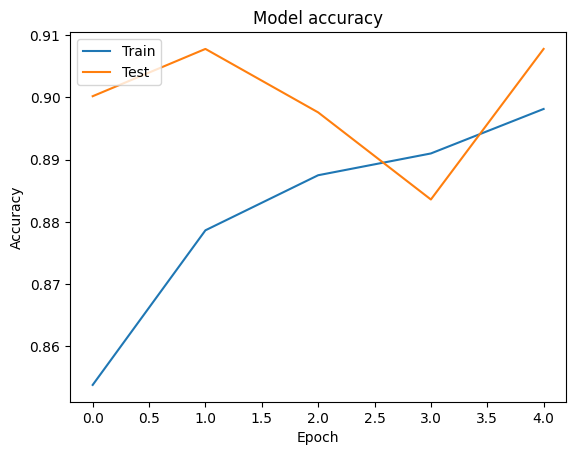

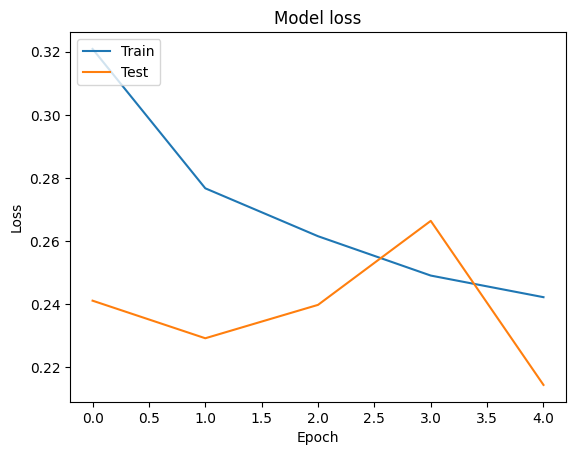

In [28]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
# epoch=5
import numpy as np
import cv2
from keras.preprocessing import image
from keras.models import load_model
model= load_model('model.keras')
def predict_one_image(img, model):
  img = cv2.resize(img, (150, 150), interpolation = cv2.INTER_CUBIC)
  img = np.reshape(img, (1, 150, 150, 3))
  img = img/255.
  pred = model.predict(img)
  class_num = np.argmax(pred)
  return class_num, np.max(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 0 
Probability: 0.93520474
This is a cat


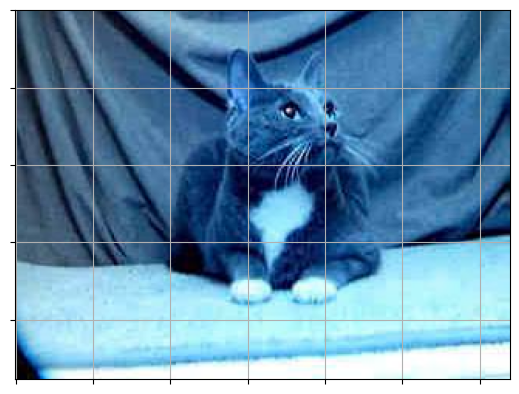

In [46]:
import cv2
import os
from matplotlib import pyplot as plt

# datas=os.listdir("/kaggle/input/dogs-vs-cats/dataset/test")

# test_img = cv2.imread('/kaggle/input/dogs-vs-cats/dataset/test/dogs/dog (2699).jpg')
# test_img = cv2.imread('/kaggle/input/dogs-vs-cats/dataset/test/dogs/dog (2487).jpg')
# test_img = cv2.imread('/kaggle/input/dogs-vs-cats/dataset/test/dogs/dog (4929).jpg')
test_img = cv2.imread('/kaggle/input/dogs-vs-cats/dataset/test/cats/cat (5178).jpg')
# test_img = cv2.imread('/kaggle/input/dogs-vs-cats/dataset/test/cats/cat (4752).jpg')

# print(predict_one_image(test_img,model))
pred, probability = predict_one_image(test_img,model)
print("Prediction:",pred,"\nProbability:",probability)

if pred == 0:
    print("This is a cat" )
    _, ax = plt.subplots(1)
    plt.imshow(test_img)
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid('off')
    plt.show()
else:
    print("This is a dog" )
    plt.imshow(test_img)



Found 5000 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/157 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step

W0000 00:00:1722587559.551902     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step
Confusion Matrix
[[2225  275]
 [ 186 2314]]
Classification Report
              precision    recall  f1-score   support

        cats       0.92      0.89      0.91      2500
        dogs       0.89      0.93      0.91      2500

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



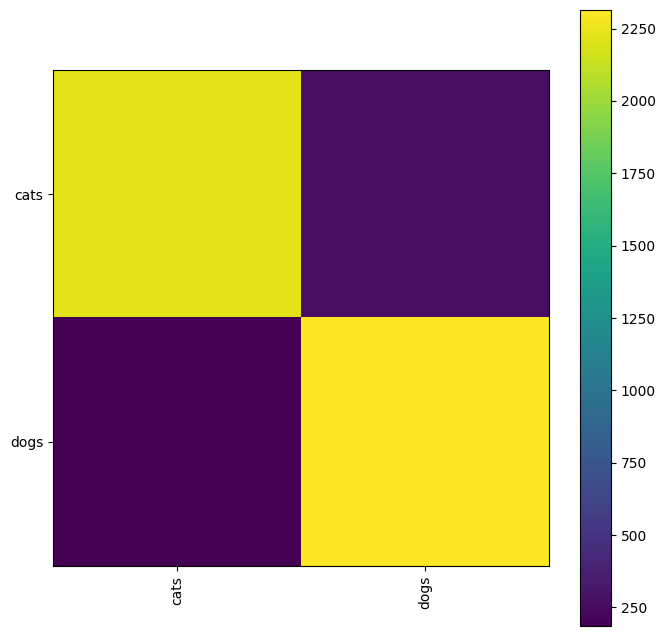

In [47]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 20000
nb_validation_samples = 5000

#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)